In [408]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [409]:
def line_distance(pt1, pt2, pt3, pt4):
    """Calculate Euclidean distance between two lines (pt1-pt2 and pt3-pt4)."""
    return np.linalg.norm(np.array(pt1) - np.array(pt3)) + np.linalg.norm(np.array(pt2) - np.array(pt4))

In [410]:
def point_distance(x, y):
    """Calculate Euclidean distance between two points."""
    return np.linalg.norm(np.array(x) - np.array(y))

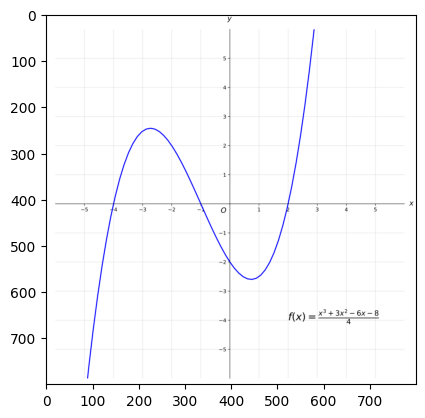

In [411]:
path = "image1.png"
img = cv2.imread(path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

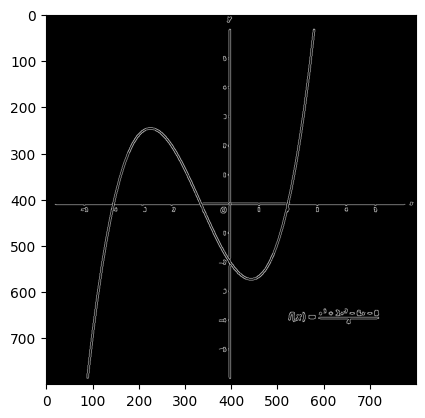

In [412]:
blur = cv2.GaussianBlur(img, (9, 9), 0)
gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gray, 100, 200)
#kernel = np.ones((5, 5), np.uint8)
#canny = cv2.morphologyEx(canny, cv2.mor, kernel)
plt.imshow(canny, cmap='gray')

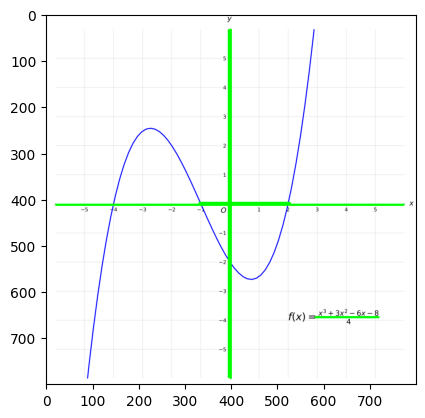

In [413]:
hough = cv2.HoughLinesP(canny, 1, 3.14/180, 100, minLineLength=100, maxLineGap=10)
for line in hough:
    x1, y1, x2, y2 = line[0]
    if x1 == x2 or y1 == y2:
        x1, y1, x2, y2 = line[0]
        cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 3)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

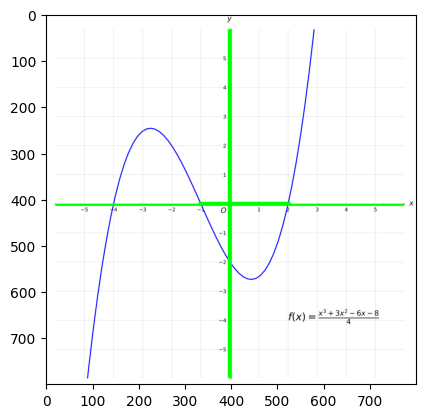

In [414]:
xy = []
for line in hough:
    x1, y1, x2, y2 = line[0]
    if x2 - x1 == 0:
        angle = 90
    else:
        angle = np.degrees(np.arctan((y2 - y1) / (x2 - x1)))
    
    if abs(angle)  == 0:        
        #cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 3)
        xy.append(((x1, y1), (x2, y2)))
    elif abs(angle) == 90:       
        #cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 3)
        xy.append(((x1, y1), (x2, y2)))
xy = sorted(xy, key=lambda line: point_distance(line[0], line[1]))[::-1][0:4]
img = cv2.imread(path)
for x,y in xy :
    cv2.line(img, x, y, (0, 255, 0), 3)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [415]:
print(xy)
print(sorted(xy, key=lambda line: point_distance(line[0], line[1])))

[((np.int32(399), np.int32(787)), (np.int32(399), np.int32(33))), ((np.int32(21), np.int32(412)), (np.int32(773), np.int32(412))), ((np.int32(395), np.int32(785)), (np.int32(395), np.int32(34))), ((np.int32(331), np.int32(408)), (np.int32(527), np.int32(408)))]
[((np.int32(331), np.int32(408)), (np.int32(527), np.int32(408))), ((np.int32(395), np.int32(785)), (np.int32(395), np.int32(34))), ((np.int32(21), np.int32(412)), (np.int32(773), np.int32(412))), ((np.int32(399), np.int32(787)), (np.int32(399), np.int32(33)))]


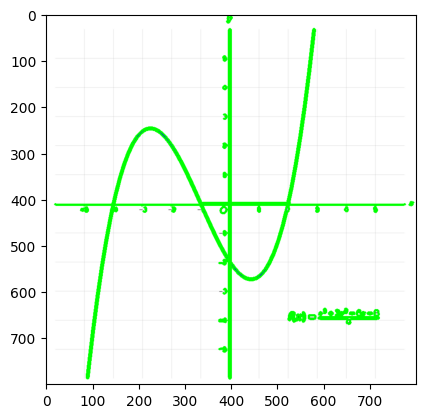

In [416]:
contours, _ = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img, contours, -1, (0, 255, 0), 3)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

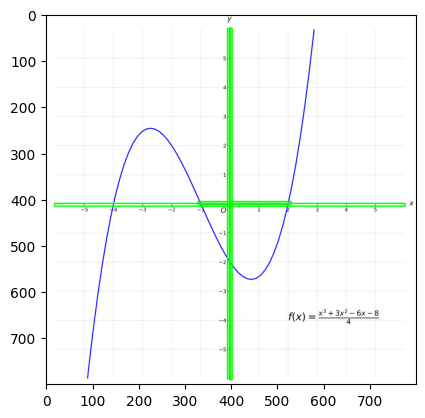

In [417]:
bboxes = []
img  = cv2.imread(path)

for x,y in xy :
    x1,y1 = x
    x2,y2 = y
    padding = 3

    
    min_x = min(x1, x2)-padding
    max_x = max(x1, x2)+padding
    min_y = min(y1, y2)-padding
    max_y = max(y1, y2)+padding

    
    cv2.rectangle(img, (min_x, min_y), (max_x, max_y), (0, 255, 0), 2)
    bboxes.append(((min_x, min_y), (max_x, max_y)))

    
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


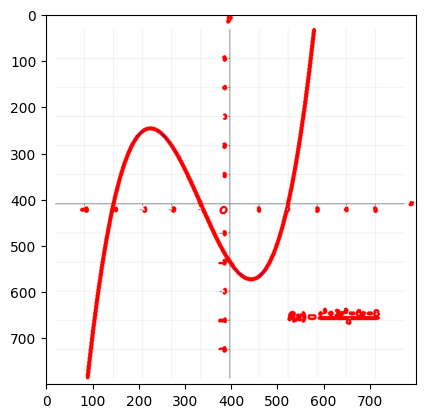

In [418]:
filtered_contours = []
for contour in contours:
    new_contour = []
    for point in contour:
        x, y = point[0]
        inside_bbox = False
        for bbox in bboxes:
            (min_x, min_y), (max_x, max_y) = bbox
            if min_x <= x <= max_x and min_y <= y <= max_y:
                inside_bbox = True
                break
        if not inside_bbox:
            new_contour.append((x, y))
    if new_contour:
        filtered_contours.append(np.array(new_contour, dtype=np.int32))
""" kernel = np.ones((5, 5), np.uint8)
for i in range(len(filtered_contours)):
    mask = np.zeros_like(gray)
    cv2.drawContours(mask, filtered_contours, i, 255, -1)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    filtered_contours[i], _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) """
filtered_contours = sorted(filtered_contours, key=len)[::-1]

img = cv2.imread(path)
cv2.drawContours(img, filtered_contours, -1, (0, 0, 255), 3)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

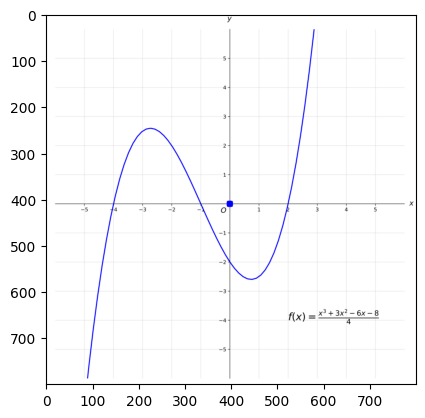

In [ ]:
def line_intersection(line1, line2):
    x1, y1 = line1[0]
    x2, y2 = line1[1]
    x3, y3 = line2[0]
    x4, y4 = line2[1]

    denom = (x1 - x2) * (y3 - y4) - (y1 - y2) * (x3 - x4)
    if denom == 0:
        return None  

    px = ((x1 * y2 - y1 * x2) * (x3 - x4) - (x1 - x2) * (x3 * y4 - y3 * x4)) / denom
    py = ((x1 * y2 - y1 * x2) * (y3 - y4) - (y1 - y2) * (x3 * y4 - y3 * x4)) / denom

    return (int(px), int(py))
img = cv2.imread(path)
intersection_points = []
for i in range(len(xy)):
    for j in range(i + 1, len(xy)):
        point = line_intersection(xy[i], xy[j])
        if point:
            intersection_points.append(point)

            for point in intersection_points:
                cv2.circle(img, point, 5, (255, 0, 0),-1 )

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


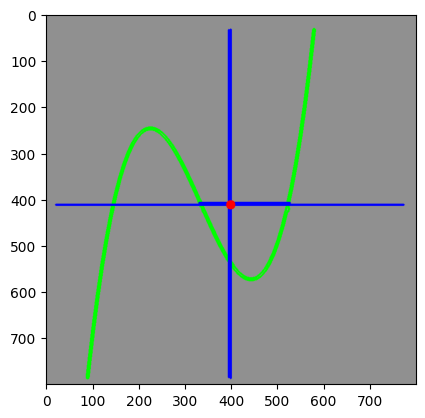

In [420]:

img = np.ones_like(cv2.imread(path))*144
cv2.drawContours(img, filtered_contours[0:1], -1, (0, 255, 0), 3)
for x,y in xy :
    cv2.line(img,x,y,(255,0,0),3)
cv2.circle(img, intersection_points[0], 10, (0, 0, 255),-1 )
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()